In [202]:
import sys
import numpy as np
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
def get_datasets(loss):
    if loss == 'logit':
        datasets = ["a9a", "australian", "breast_cancer", "german_numer",
                    "ijcnn1", "ionosphere", "splice", "svmguide3", "w8a"]
    elif loss == 'ls':
        datasets = ['abalone_scale', 'bodyfat_scale', 'cpusmall_scale',
                    'housing_scale', 'pyrim_scale',
                    'YearPredictionMSD', 'triazines_scale', 'virusShare']
    else:
        raise ValueError(f'Invalid loss:{loss}')
    return datasets

In [271]:
def get_one_instance(date, loss, dataset, lambda_shrinage, percent):
    dir_lst = []
    label_lst = []
    Fseq_lst = []
    Eseq_lst = []
    naive_dir_base = f'../IPG/test/log/{date}/naive/{loss}/{lambda_shrinage}_{percent}'
    naive_exact_dir = f'{naive_dir_base}_exact_/{dataset}_info.npy'
    naive_exact_label = 'exact'
    dir_lst.append(naive_exact_dir)
    label_lst.append(naive_exact_label)
    naive_const_dir = f'{naive_dir_base}_const_1000.0/{dataset}_info.npy'
    naive_const_label = 'const-1000.0'
    dir_lst.append(naive_const_dir)
    label_lst.append(naive_const_label)
    for safe_guard in ['laststep', 'schimdt']:
        for const in [1.0, 10.0]:
            directory = f'{naive_dir_base}_{safe_guard}_{const}/{dataset}_info.npy'
            label = f'{safe_guard}-{const}'
            dir_lst.append(directory)
            label_lst.append(label)
    sch_dir = f'../IPG/test/log/{date}/schimdt/{loss}/{lambda_shrinage}_{percent}__/{dataset}_info.npy'
    sch_label = 'Schimdt'
    dir_lst.append(sch_dir)
    label_lst.append(sch_label)
    # load data
    for i in dir_lst:
        info = np.load(i, allow_pickle=True).item()
        Fseq_lst.append(info['Fseq'])
        Eseq_lst.append(info['Eseq'])
    return Fseq_lst, Eseq_lst, label_lst
def create_plot(dataset, lambda_shrinage, percent, fxmax, exmax, Fseq_lst, Eseq_lst, label_lst, alpha, markerset='fill', savedir=None, ext=None):
    fig, (row1, row2) = plt.subplots(2, 2, figsize=(12,6))
    # color_idx = np.linspace(0, 1, len(label_lst))
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    if markerset == 'fill':
        markers=['o', 's', 'P', '*', 'D', 'X', 'p']
    else:
        markers=['.', '1', 'x', '4', '+', '|', '_']        
    for i in range(len(label_lst)):
        row1[0].plot(Fseq_lst[i], markers[i], color=colors[i], label=f'{label_lst[i]}: {len(Fseq_lst[i])}', alpha=alpha)
    for i in range(1, len(label_lst)):
        row1[1].plot(Eseq_lst[i], markers[i], color=colors[i], label=f'{label_lst[i]}: {len(Fseq_lst[i])}', alpha=alpha)
    for i in [1, 2, 6]:
        row2[0].plot(Eseq_lst[i], markers[i], color=colors[i], label=f'{label_lst[i]}: {len(Fseq_lst[i])}', alpha=alpha) 
    for i in [1, 4, 6]:
        row2[1].plot(Eseq_lst[i], markers[i], color=colors[i], label=f'{label_lst[i]}: {len(Fseq_lst[i])}', alpha=alpha) 
    row1[0].legend()
    row1[1].legend()
    row2[0].legend()
    row2[1].legend()
    if fxmax != -1:
        row1[0].set_xlim((-1, fxmax))
    row1[0].set_yscale('log')
    if exmax != -1:
        row1[1].set_xlim((-1, exmax))
        row2[0].set_xlim((-1, exmax))
        row2[1].set_xlim((-1, exmax))
    row1[1].set_yscale('log')
    row2[0].set_yscale('log')
    row2[1].set_yscale('log')
    fig.suptitle(f'{dataset}-{lambda_shrinage}-{percent}', fontsize="x-large",  y=1.02)
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.0)
    if savedir is not None:
        if ext is not None:
            plt.savefig(f'{savedir}/{dataset}_{lambda_shrinage}_{percent}_{ext}.png', bbox_inches = "tight")
        else:
            plt.savefig(f'{savedir}/{dataset}_{lambda_shrinage}_{percent}.png', bbox_inches = "tight")
        plt.close(fig)
def sanity_check(date, loss, dataset, lambda_shrinage, percent):    
    print('='*20 + f'{dataset}' + '='*(70-len(dataset)-20))
    Fseq_lst, Eseq_lst, label_lst = get_one_instance(date='04_10_2021', loss='logit', dataset='australian', lambda_shrinage=0.01, percent=0.1)
    for i in range(len(Fseq_lst)):
        print(f'{label_lst[i]:16s}: Ffinal:{Fseq_lst[i][-1]:2.5e} | Errorfinal:{Eseq_lst[i][-1]:2.5e}')
    print('='*70)
def main(date, loss, dataset, lambda_shrinage, percent, fxmax, exmax, markerset='fill', alpha=0.3, savedir=None, ext=None):
    Fseq_lst, Eseq_lst, label_lst = get_one_instance(date, loss, dataset, lambda_shrinage, percent)
    create_plot(dataset, lambda_shrinage, percent, fxmax, exmax, Fseq_lst, Eseq_lst, label_lst, alpha, markerset, savedir, ext)

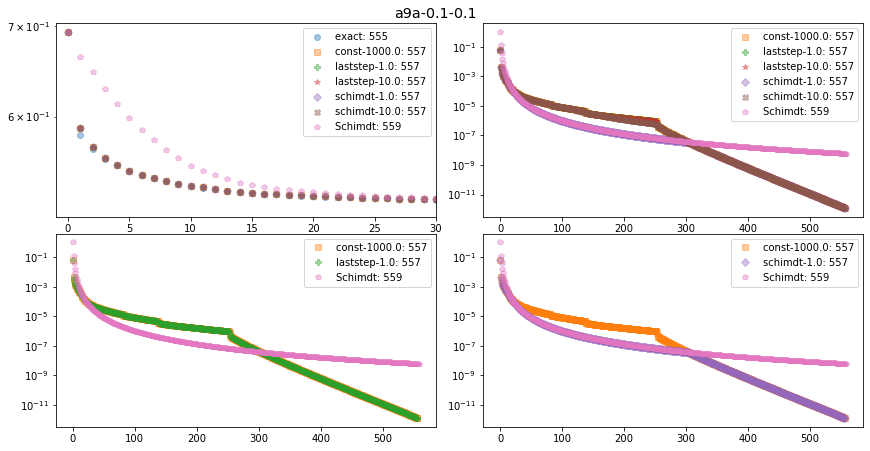

In [261]:
main(date='04_10_2021', loss='logit', dataset='a9a', lambda_shrinage=0.1, percent=0.1, fxmax=30, exmax=-1, alpha=0.4)

In [262]:
# run all
run = False
if run:
    for loss in ['logit', 'ls']:
        for db in get_datasets(loss):
            for lambda_shrinage in [0.1, 0.01]:
                for percent in [0.1, 0.3]:
                    main(date='04_10_2021', loss=loss, dataset=db, lambda_shrinage=lambda_shrinage, percent=percent, fxmax=30, exmax=-1, alpha=0.4, savedir='./instancePlot')

In [264]:
sanity_check(date='04_10_2021', loss='logit', dataset='australian', lambda_shrinage=0.01, percent=0.1)
sanity_check(date='04_10_2021', loss='ls', dataset='YearPredictionMSD', lambda_shrinage=0.01, percent=0.1)
sanity_check(date='04_10_2021', loss='ls', dataset='abalon_scale', lambda_shrinage=0.01, percent=0.1)
sanity_check(date='04_10_2021', loss='ls', dataset='cpusmall_scale', lambda_shrinage=0.1, percent=0.3)

====================australian========================================
exact           : Ffinal:6.35926e-01 | Errorfinal:1.91257e-06
const-1000.0    : Ffinal:6.35922e-01 | Errorfinal:1.88603e-06
laststep-1.0    : Ffinal:6.35922e-01 | Errorfinal:1.88603e-06
laststep-10.0   : Ffinal:6.35922e-01 | Errorfinal:1.88603e-06
schimdt-1.0     : Ffinal:6.35922e-01 | Errorfinal:3.33981e-09
schimdt-10.0    : Ffinal:6.35921e-01 | Errorfinal:3.32488e-08
Schimdt         : Ffinal:6.37087e-01 | Errorfinal:3.01774e-09
====================YearPredictionMSD=================================
exact           : Ffinal:6.35926e-01 | Errorfinal:1.91257e-06
const-1000.0    : Ffinal:6.35922e-01 | Errorfinal:1.88603e-06
laststep-1.0    : Ffinal:6.35922e-01 | Errorfinal:1.88603e-06
laststep-10.0   : Ffinal:6.35922e-01 | Errorfinal:1.88603e-06
schimdt-1.0     : Ffinal:6.35922e-01 | Errorfinal:3.33981e-09
schimdt-10.0    : Ffinal:6.35921e-01 | Errorfinal:3.32488e-08
Schimdt         : Ffinal:6.37087e-01 | Errorfinal:3.

In [274]:
main(date='04_10_2021', loss='logit', dataset='a9a', lambda_shrinage=0.1, percent=0.1, fxmax=30, exmax=100, alpha=0.4, savedir='./instancePlot', ext='zoom')
main(date='04_10_2021', loss='logit', dataset='w8a', lambda_shrinage=0.01, percent=0.3, fxmax=30, exmax=500, alpha=0.4, savedir='./instancePlot', ext='zoom')
main(date='04_10_2021', loss='ls', dataset='housing_scale', lambda_shrinage=0.1, percent=0.3,fxmax=30, exmax=50, alpha=0.4, savedir='./instancePlot', ext='zoom')
main(date='04_10_2021', loss='ls', dataset='virusShare', lambda_shrinage=0.01, percent=0.1, fxmax=30, exmax=300, alpha=0.4, savedir='./instancePlot', ext='zoom')